# Exploratory Analysis

### Import librarys and data

In [7]:
# Import NumPy for numerical computing
import numpy as np

# Import Pandas for DataFrames
import pandas as pd

# Import Matplotlib for visulization
from matplotlib import pyplot as plt
# Display plots in the notebook
%matplotlib inline

# Import Seaborn for easier visulization
import seaborn as sns

In [8]:
# Load employee data from CSV to dataframe
df = pd.read_csv('project_files/employee_data.csv')

### Basic information on the data

In [10]:
# Dimensions of the dataframe
df.shape

(14249, 10)

Looks like we have 14249 observations, 9 features with 1 target variable.

In [12]:
# Type of data in the dataframe
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [14]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [17]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


### Distribition of numeric features


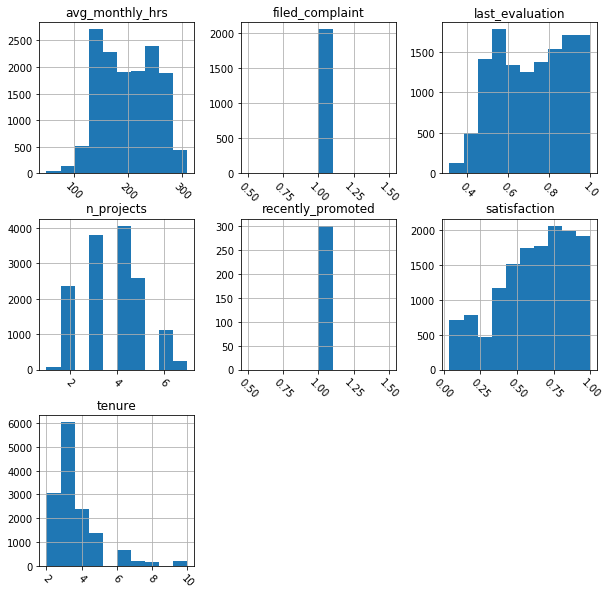

In [18]:
# Plot histogram grid
df.hist(figsize=(10,10),xrot=-45)
plt.show()

In [21]:
# Summary of the numerical feature
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


### Distribition of categorical features

In [23]:
# summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


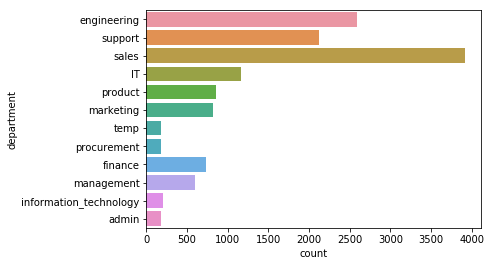

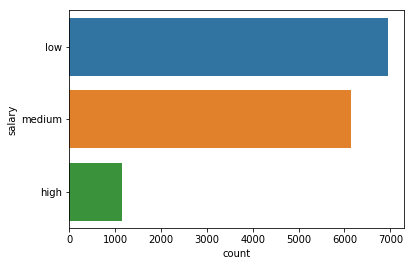

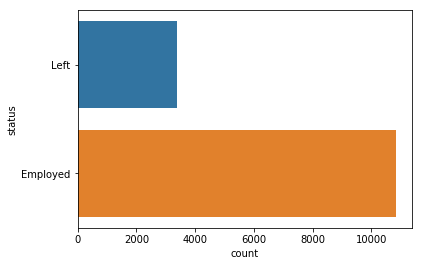

In [26]:
# Plot bar plots for each of the categorical feature

for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

### Segment data to see relation between numeric and categorical data

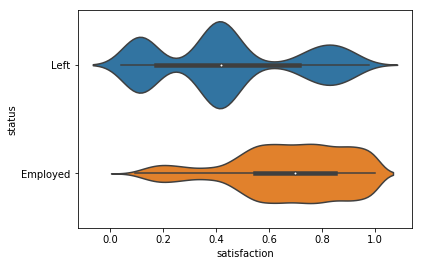

In [31]:
# Segment satisfication by status
sns.violinplot(x='satisfaction', y='status', data=df)
plt.show()

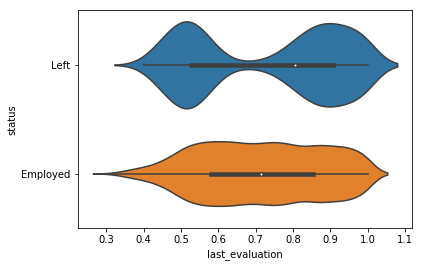

In [33]:
# Segment last_evaluation by status
sns.violinplot(x='last_evaluation', y='status', data=df)
plt.show()

In [34]:
# Get avergae and std devation summary for all numeric data by segmenting by 'status'
df.groupby('status').agg('mean')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


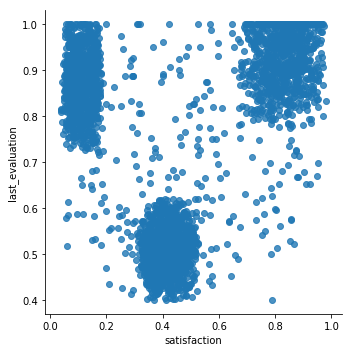

In [43]:
# Bivariate segmentation: scatter plot of satisfaction vs las_evalutation, for employees who left
sns.lmplot(x='satisfaction', y='last_evaluation', data= df[df.status == 'Left'], fit_reg=False)

### Check correlation between numerical features

In [36]:
# Create coorelation dataframe from df
coorelation = df.corr()
coorelation

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,NaN,0.340136,0.443221,NaN,-0.019622,0.124954
filed_complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,0.340136,NaN,1.000000,0.345590,NaN,0.089189,0.132100
n_projects,0.443221,NaN,0.345590,1.000000,NaN,-0.143514,0.192653
recently_promoted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,-0.019622,NaN,0.089189,-0.143514,NaN,1.000000,-0.097301
tenure,0.124954,NaN,0.132100,0.192653,NaN,-0.097301,1.000000


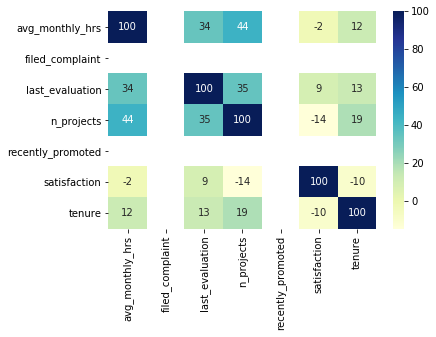

In [38]:
# Plot a heatmap of the coorelations
sns.heatmap(coorelation*100,annot=True,fmt='.0f', cmap="YlGnBu")
plt.show()